In [74]:
!pip install --upgrade seaborn
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [75]:
import pandas as pd
##########problem 1
data = pd.read_csv("/Users/abidaislam/IE459/scatter_data.csv")

print(data)

          % x          y 
0   95.954341  328.375777
1   60.162754  259.053445
2   52.754898  207.792989
3   88.034798  333.209632
4   80.271275  290.042475
..        ...         ...
95  60.430557  271.013639
96  56.943862  226.411831
97  93.616283  275.939404
98  91.772335  337.474381
99  99.863385  335.755833

[100 rows x 2 columns]


<IPython.core.display.Javascript object>


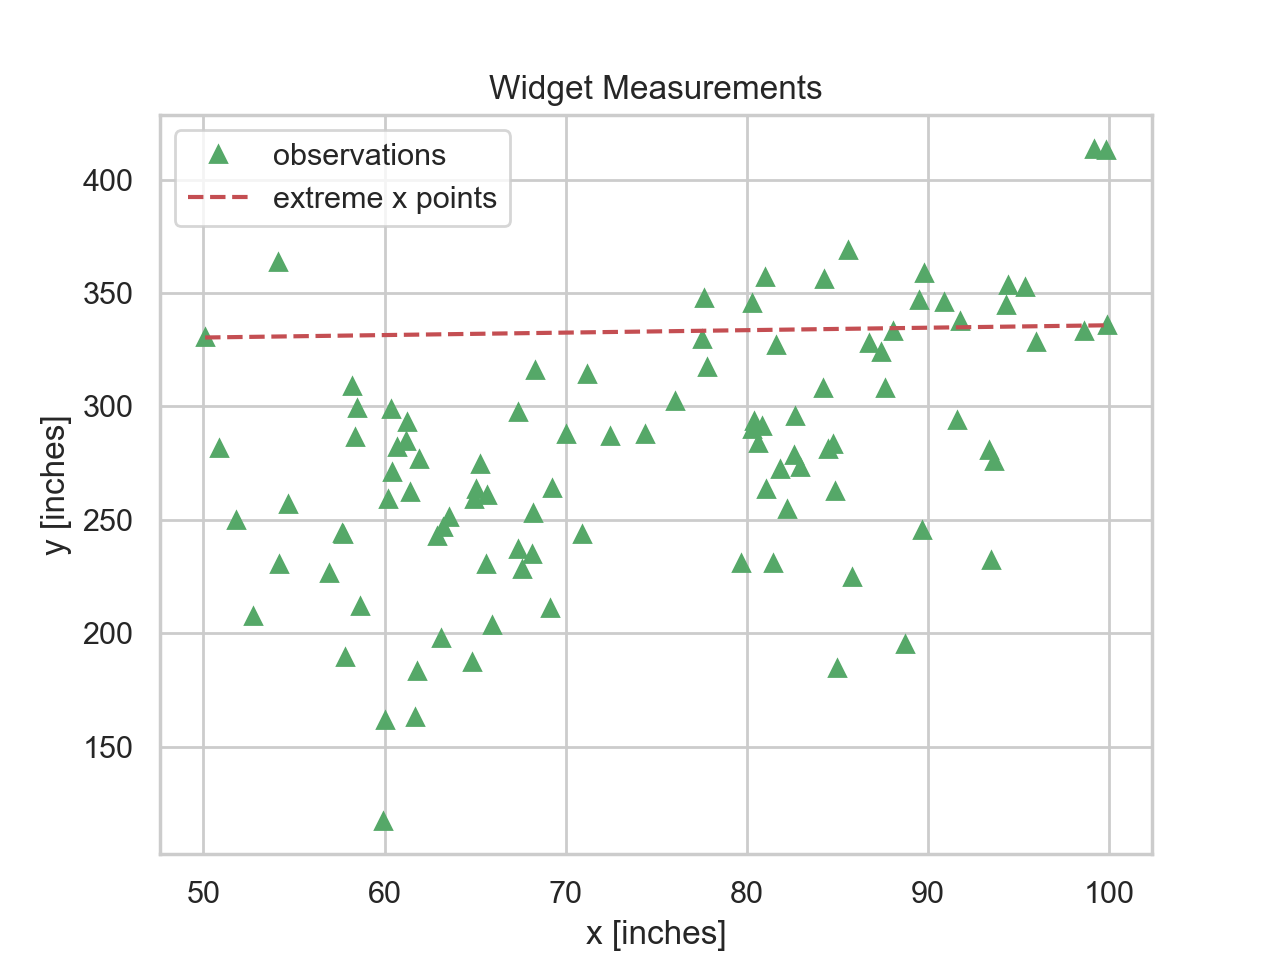

In [76]:
plt.figure()
plt.plot(data['% x'], data[' y '], 'g^',linestyle='None', label='observations')
plt.title("Widget Measurements")
plt.ylabel('y [inches]')
plt.xlabel("x [inches]")
left_most_x = data['% x'].min()
right_most_x = data['% x'].max()

left_most_y = data[data['% x'] == left_most_x][' y '].min()
right_most_y = data[data['% x'] == right_most_x][' y '].min()

plt.plot([left_most_x, right_most_x], [left_most_y, right_most_y],
         color='r', linestyle='--', label='extreme x points')
plt.legend()


In [77]:

import numpy as np
data_2 = pd.read_csv("/Users/abidaislam/IE459/student_grades.csv")


print(data_2)
print(data_2.columns)

    % studentID   avgScore 
0             0   81.563259
1             1   67.426527
2             2   86.415197
3             3   80.387361
4             4   76.669249
..          ...         ...
70           70   64.622963
71           71   86.951039
72           72   85.339374
73           73   69.082293
74           74  100.021837

[75 rows x 2 columns]
Index(['% studentID', ' avgScore '], dtype='object')


<IPython.core.display.Javascript object>


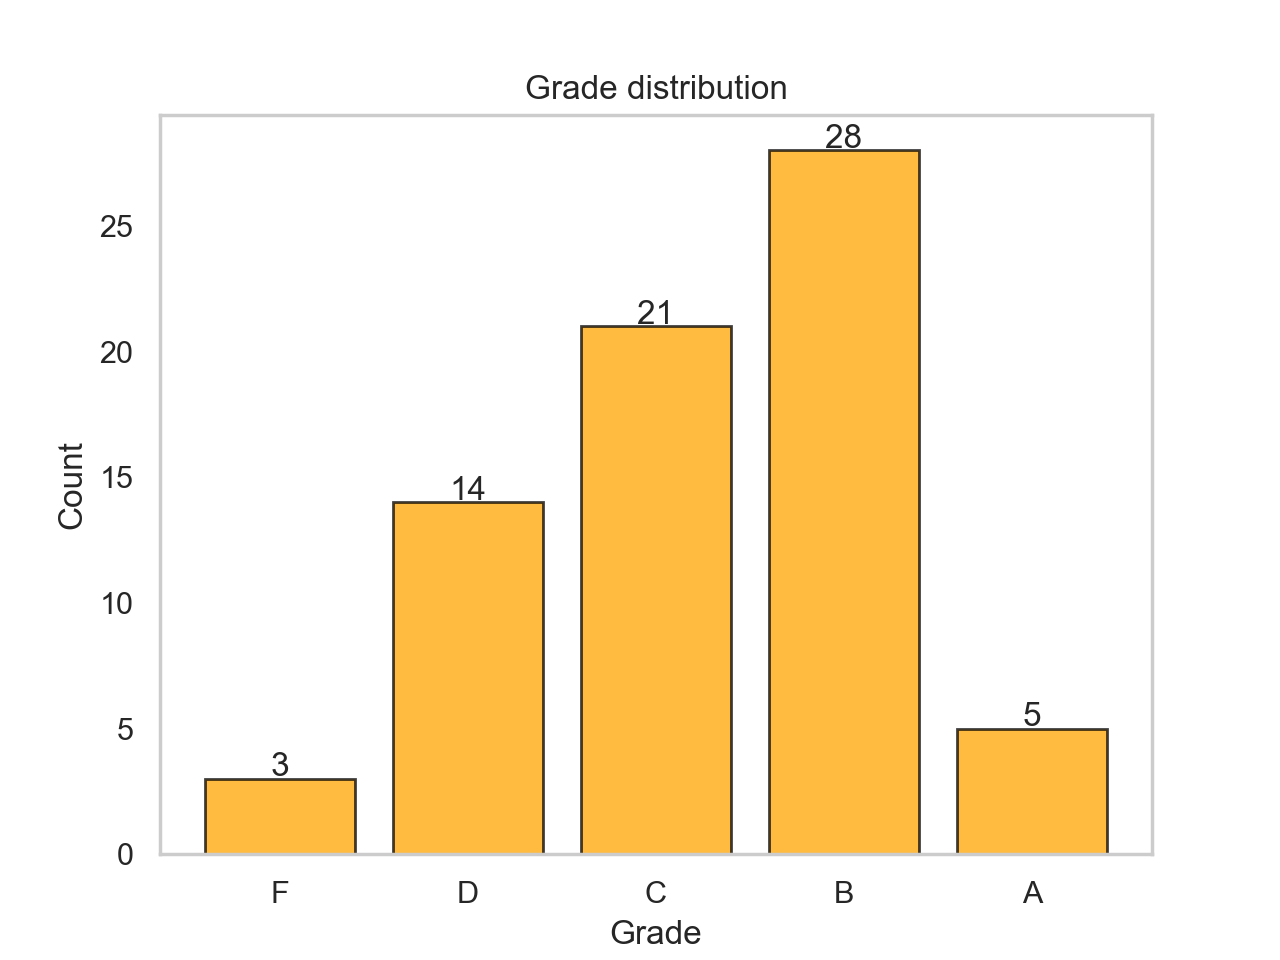

In [78]:
###problem 2
plt.figure()
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
bins = [0, 60, 70, 80, 90, 100]
labels = ['F', 'D', 'C', 'B', 'A']

data_2['Grade'] = pd.cut(data_2[' avgScore '], bins=bins, labels=labels, right=False)

hist, _ = np.histogram(data_2[' avgScore '], bins=bins)
plt.bar(labels, hist, color='orange', edgecolor='black', alpha=0.75)
###categorize the values in the 'avgScore' column into discrete bins specified by the bins parameter. The labels parameter provides labels for the bins, 
#and the right=False argument means that the intervals are left-closed and right-open.

for x, y in zip(labels, hist):
    plt.text(x, y + 0.1, str(y), ha='center')


plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Grade distribution')
plt.show()
plt.grid(False)


In [79]:
#problem 3
data_5 = pd.read_csv("/Users/abidaislam/IE459/solution_data.csv")


print(data_5)

    % Problem           SolnMethod       Value
0           0    genetic algorithm  112.749860
1           0  simulated annealing   75.220917
2           0          tabu search  111.574225
3           0              optimal  166.170172
4           1    genetic algorithm   31.819762
5           1  simulated annealing   34.014603
6           1          tabu search   41.022612
7           1              optimal   48.634470
8           2    genetic algorithm   68.709200
9           2  simulated annealing   44.886988
10          2          tabu search   57.290797
11          2              optimal  104.148106
12          3    genetic algorithm   46.387311
13          3  simulated annealing   35.335046
14          3          tabu search   51.727828
15          3              optimal   68.404717
16          4    genetic algorithm   35.103455
17          4  simulated annealing   22.944971
18          4          tabu search   40.217290
19          4              optimal   52.252706
20          5

In [80]:
optimal_values = data_5.loc[data_5['SolnMethod'] == 'optimal', ['% Problem', 'Value']].set_index('% Problem')['Value']
print(optimal_values)

% Problem
0    166.170172
1     48.634470
2    104.148106
3     68.404717
4     52.252706
5      1.733297
6     69.682901
7     75.051565
8    196.772564
9    133.472658
Name: Value, dtype: float64


In [81]:
data_5['Optimality Gap'] = data_5.apply(lambda row: ((optimal_values[row['% Problem']] - row['Value']) / optimal_values[row['% Problem']]) * 100, axis=1)


In [82]:
print(data_5)

    % Problem           SolnMethod       Value  Optimality Gap
0           0    genetic algorithm  112.749860       32.147955
1           0  simulated annealing   75.220917       54.732600
2           0          tabu search  111.574225       32.855444
3           0              optimal  166.170172        0.000000
4           1    genetic algorithm   31.819762       34.573643
5           1  simulated annealing   34.014603       30.060710
6           1          tabu search   41.022612       15.651159
7           1              optimal   48.634470        0.000000
8           2    genetic algorithm   68.709200       34.027413
9           2  simulated annealing   44.886988       56.900812
10          2          tabu search   57.290797       44.991033
11          2              optimal  104.148106        0.000000
12          3    genetic algorithm   46.387311       32.186970
13          3  simulated annealing   35.335046       48.344138
14          3          tabu search   51.727828       24

<IPython.core.display.Javascript object>


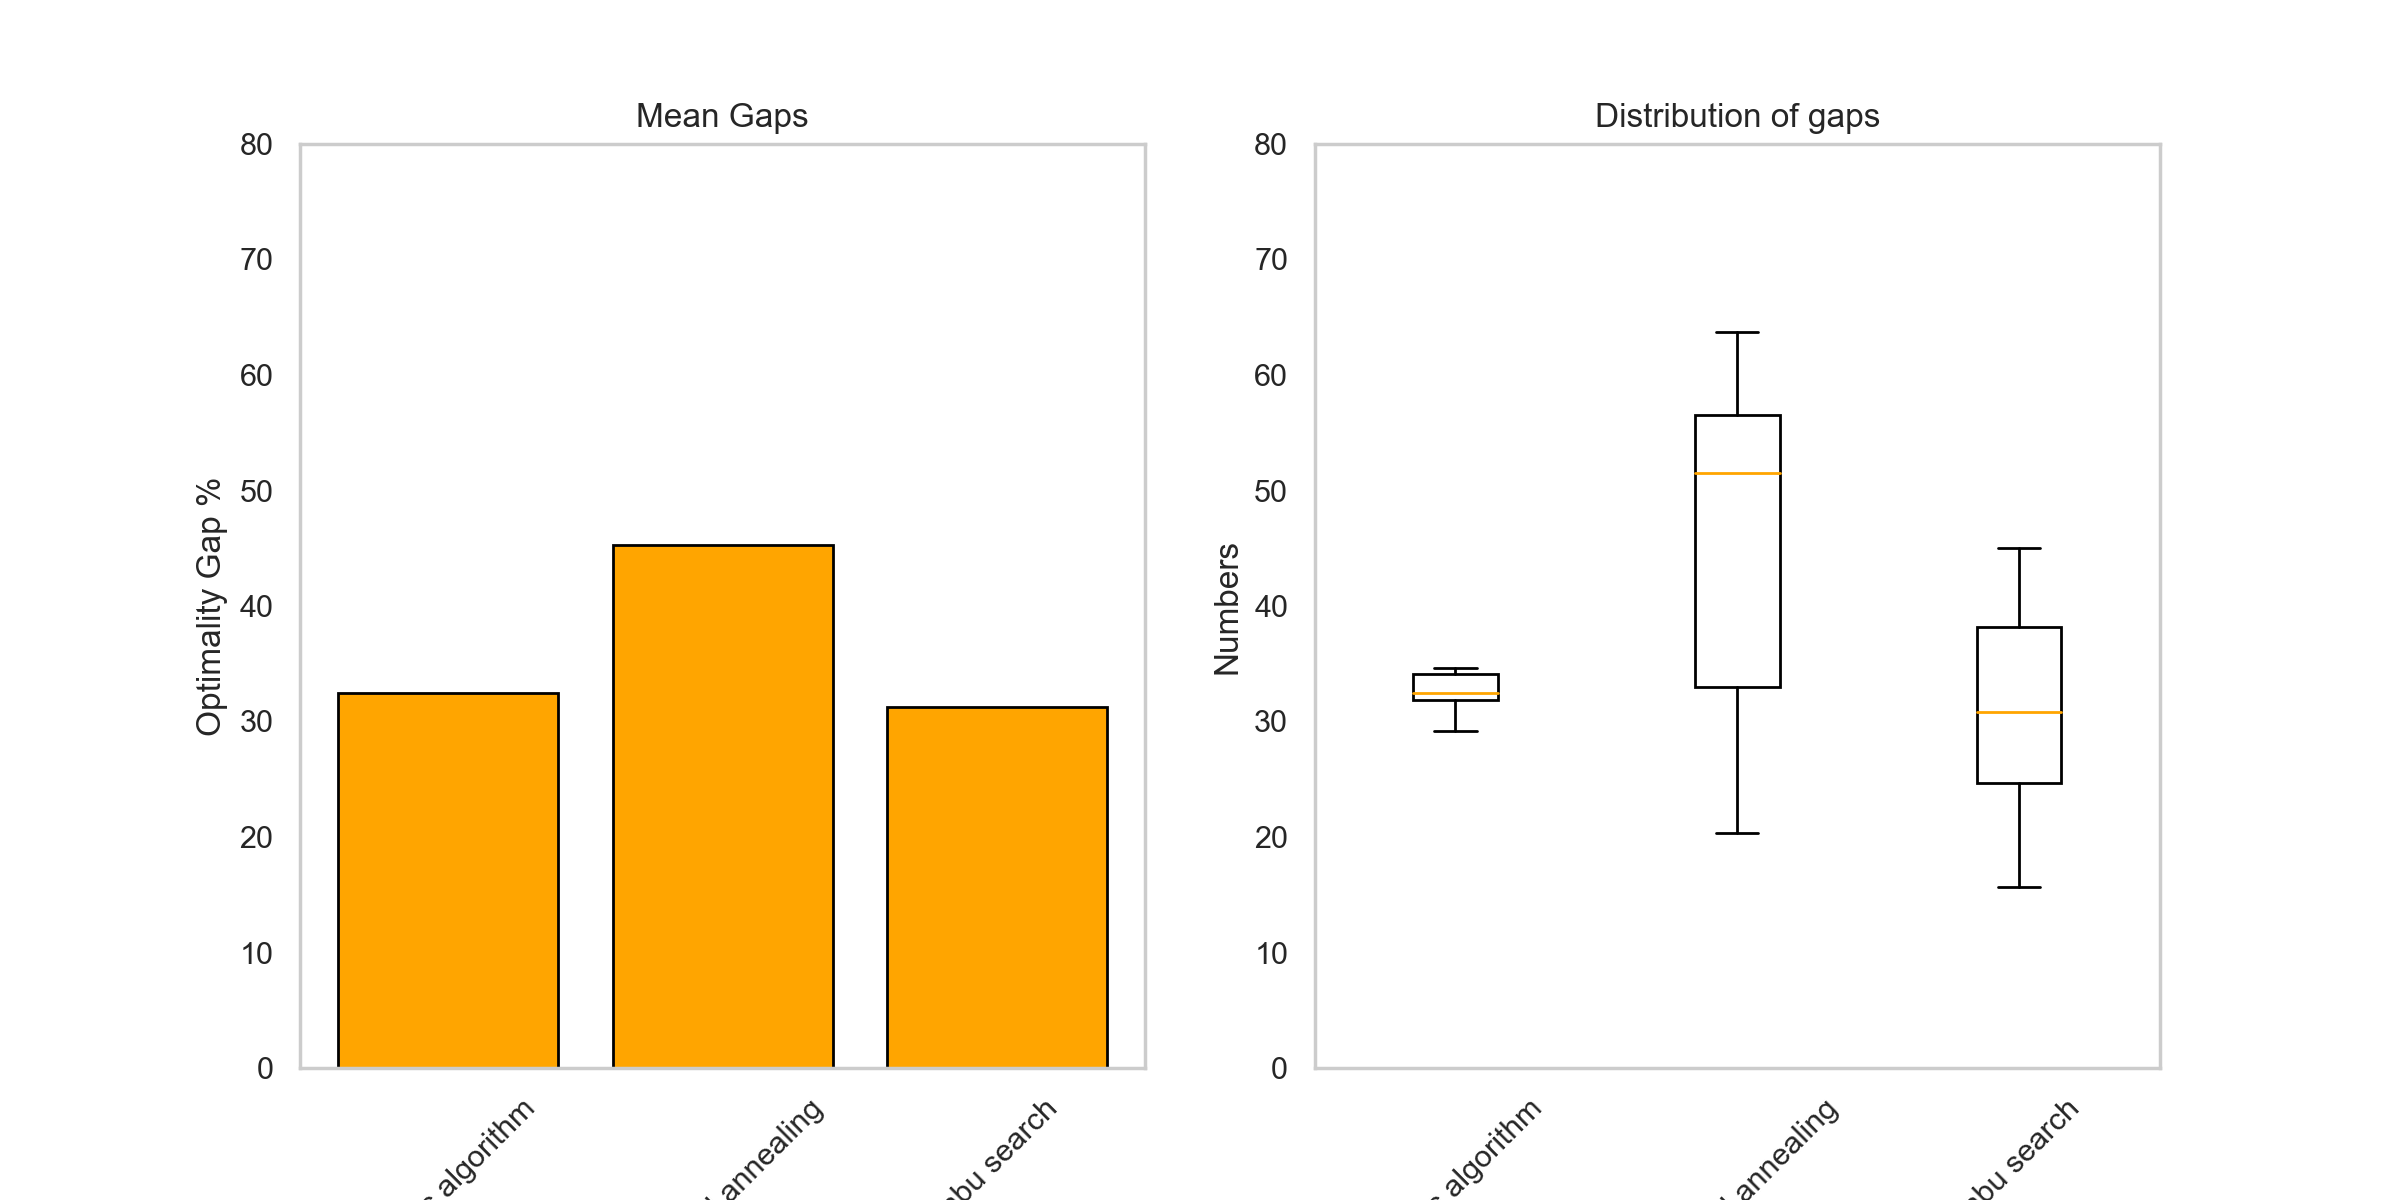

In [83]:
average_optimality_gap = data_5[data_5['SolnMethod'] != 'optimal'].groupby('SolnMethod')['Optimality Gap'].mean()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
plt.grid(False)
# Bar plot(left subplot)
ax1.bar(average_optimality_gap.index, average_optimality_gap.values, color='orange', edgecolor='black')
ax1.set_xlabel('Heuristic Method')
ax1.set_ylabel('Optimality Gap %')
ax1.set_title('Mean Gaps')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(0, 80)  
ax1.grid(False) 

# Box plot (right subplot)
optimality_gaps = [data_5[data_5['SolnMethod'] == method]['Optimality Gap'].values for method in average_optimality_gap.index]

ax2.boxplot(optimality_gaps, labels=average_optimality_gap.index, showfliers=False, boxprops=dict(facecolor='white'),medianprops={'color':'orange'}, patch_artist=True)
ax2.set_xlabel('Heuristic Method')
ax2.set_ylabel('Numbers')
ax2.set_title('Distribution of gaps')
ax2.tick_params(axis='x', rotation=45)

ax2.set_ylim(0, 80)
plt.suptitle('Comparison of Optimality Gaps for Heuristics', y=1.05)
plt.show()
ax2.grid(False) 

In [84]:
##part 2
!pip install --upgrade seaborn
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

Click the following link to access the dataset: https://www.kaggle.com/datasets/jsphyg/tipping
Click the following link to access the dataset: https://seaborn.pydata.org/examples/wide_form_violinplot.html


<IPython.core.display.Javascript object>


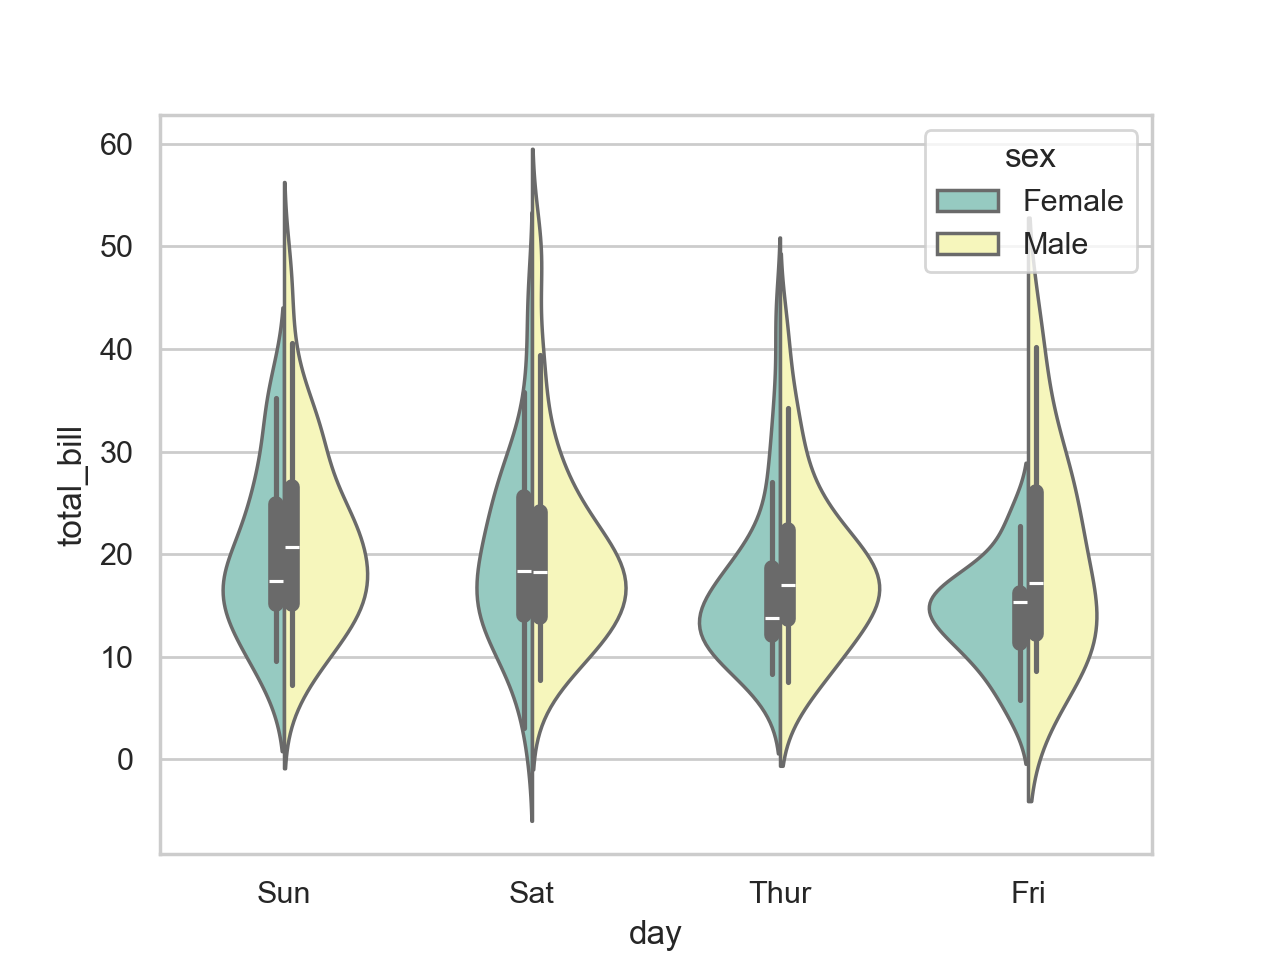

<IPython.core.display.Javascript object>


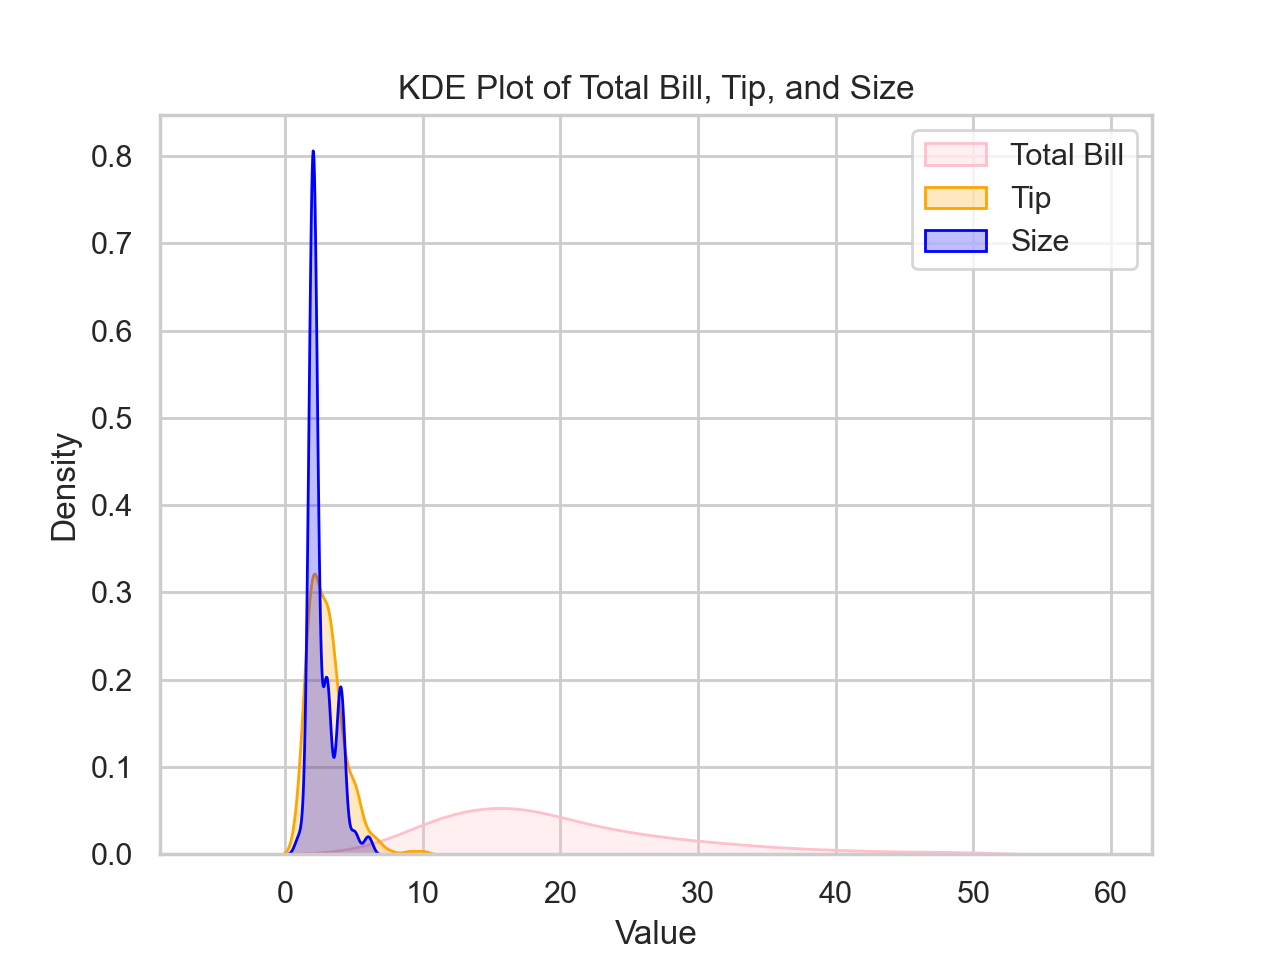

In [85]:

kaggle_dataset_url = "https://www.kaggle.com/datasets/jsphyg/tipping"
print(f"Click the following link to access the dataset: {kaggle_dataset_url}")
plot_url = "https://seaborn.pydata.org/examples/wide_form_violinplot.html"
print(f"Click the following link to access the dataset: {plot_url}")

#link of dataset https://www.kaggle.com/datasets/jsphyg/tipping
#link of the dataset: https://seaborn.pydata.org/examples/wide_form_violinplot.html
plt.figure()
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
# default Seaborn theme with a white background and grid lines. 
#The style="whitegrid" argument specifies the style of the plot.

df = pd.read_csv("/Users/abidaislam/IE459/tips.csv")

sns.violinplot(x="day", y="total_bill", data=df,hue='sex',split=True,palette='Set3')
#Creates a violin plot using Seaborn. 
##This line creates a violin plot using Seaborn. 
##Visualize the distribution of total_bill amounts for each day category. 
#The hue='sex' parameter colors the violins based on the sex column. The color palette used is 'Set3'.
#adding new empty figure for plot
plt.figure()
#These lines create three KDE (Kernel Density Estimation) plots:

#KDE plot for total_bill amounts, filled in pink.KDE plot for tip amounts, filled in orange.
#KDE plot for size values, filled in red.
#KDE plots KDE plot represents the estimated probability density of the values 
#in the 'total_bill', 'tip', and 'size' columns.
#KDE-total bill
sns.kdeplot(data=df['total_bill'], fill=True, label='Total Bill', color='pink')

#  KDE-tip
sns.kdeplot(data=df['tip'], fill=True, label='Tip', color='orange')
# KDE-size
sns.kdeplot(data=df['size'], fill=True, label='Size', color='blue')
#adding x and y axis title and also the legend.
plt.xlabel("Value")  # Set the x-axis label
plt.ylabel("Density")  # Set the y-axis label
plt.title("KDE Plot of Total Bill, Tip, and Size")  # Set the title of the plot
plt.legend()  

# Show the plot
plt.show()




